<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Multi-Layer-Perceptron" data-toc-modified-id="Multi-Layer-Perceptron-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Multi Layer Perceptron</a></span><ul class="toc-item"><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data Exploration</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Without-Preprocessing" data-toc-modified-id="Without-Preprocessing-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Without Preprocessing</a></span></li><li><span><a href="#With-Preprocessing" data-toc-modified-id="With-Preprocessing-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>With Preprocessing</a></span></li><li><span><a href="#Data-Manipulation" data-toc-modified-id="Data-Manipulation-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Data Manipulation</a></span></li></ul></li></ul></div>

# Multi Layer Perceptron

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [2]:
url = "https://raw.githubusercontent.com/fardinabbasi/Neural_Networks/MLP/ECG.csv"
ECG = pd.read_csv(url)
ECG.drop('Unnamed: 0',axis=1, inplace=True)
ECG.head()

,label,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat160,feat161,feat162,feat163,feat164,feat165,feat166,feat167,feat168,feat169
0,O,5,661.190476,658.333333,55.278736,106.962730,111.113889,13,0.928571,0.041,...,0.165551,0.196,0.321645,0.074160,0.000000,0.000000,0.000000,0.019540,0.340,0.000
1,O,5,661.666667,658.333333,56.579873,108.407273,112.510209,13,0.928571,0.150,...,0.190431,0.196,0.362420,0.085271,0.000000,0.000000,0.000000,0.022238,0.332,0.000
2,O,8,661.904762,660.000000,58.758004,112.796617,117.091412,13,0.928571,0.041,...,0.094497,0.316,0.376645,0.042448,0.000000,0.000000,0.000000,0.023166,0.452,0.000
3,O,7,660.952381,663.333333,59.029597,113.649634,117.981601,13,0.928571,0.041,...,0.157149,0.284,0.419043,0.070674,0.026236,0.015264,0.594278,0.025686,0.256,0.128
4,O,5,660.476191,663.333333,55.759820,107.623910,111.732026,13,0.928571,0.041,...,0.162662,0.204,0.354123,0.072988,0.025833,0.014326,0.657085,0.021802,0.328,0.128


## Data Exploration

N    5992
O    3151
A     923
~     187
Name: label, dtype: int64


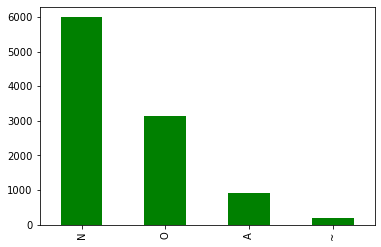

In [3]:
print(ECG['label'].value_counts())

plt.figure()
ECG['label'].value_counts().plot(kind='bar',color='g')
plt.show()

## Preprocessing

In [4]:
X = ECG.drop('label', axis = 1, inplace = False)
Y = ECG['label']

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Without Preprocessing

**Training**

In [6]:
clf = MLPClassifier(hidden_layer_sizes=(128,64,32,16), activation='relu', solver='sgd', max_iter=1000, random_state=42)
clf.fit(X_train, Y_train)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(128, 64, 32, 16), max_iter=1000,
              random_state=42, solver='sgd')

**Evaluation**

              precision    recall  f1-score   support

           A       0.00      0.00      0.00        98
           N       0.58      1.00      0.73       590
           O       0.00      0.00      0.00       321
           ~       0.00      0.00      0.00        17

    accuracy                           0.58      1026
   macro avg       0.14      0.25      0.18      1026
weighted avg       0.33      0.58      0.42      1026



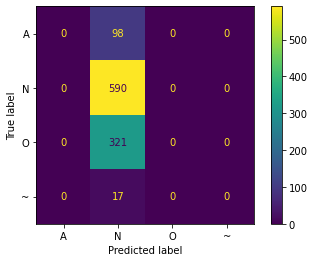

In [7]:
y_pred = clf.predict(X_test)

print(classification_report(Y_test, y_pred,zero_division=0))
ConfusionMatrixDisplay(confusion_matrix(Y_test,y_pred),display_labels=['A','N','O','~']).plot();

## With Preprocessing

**Training**

In [8]:
clf = MLPClassifier(hidden_layer_sizes=(128,64,32,16), activation='relu', solver='sgd', max_iter=1000, random_state=42)
clf.fit(X_train_scaled, Y_train)

MLPClassifier(hidden_layer_sizes=(128, 64, 32, 16), max_iter=1000,
              random_state=42, solver='sgd')

**Evaluation**

              precision    recall  f1-score   support

           A       0.91      0.84      0.87        98
           N       0.88      0.88      0.88       590
           O       0.78      0.78      0.78       321
           ~       0.42      0.59      0.49        17

    accuracy                           0.84      1026
   macro avg       0.75      0.77      0.76      1026
weighted avg       0.84      0.84      0.84      1026



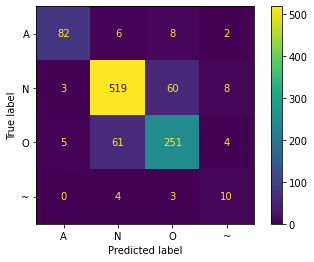

In [9]:
y_pred_scaled = clf.predict(X_test_scaled)

print(classification_report(Y_test, y_pred_scaled,zero_division=0))
ConfusionMatrixDisplay(confusion_matrix(Y_test,y_pred_scaled),display_labels=['A','N','O','~']).plot();

## Data Manipulation

In [10]:
ECG_new = ECG.drop(ECG[ECG['label'] == '~'].index, inplace=False)
ECG_new['label'].replace(['A','O'],'Other', inplace=True)

X_new = ECG_new.drop('label',axis=1)
Y_new = ECG_new['label']
X_new_train, X_new_test, Y_new_train, Y_new_test = train_test_split(X_new, Y_new, test_size=0.1, random_state=42)

**Normalization**

In [11]:
scaler = StandardScaler()
X_new_train_scaled = scaler.fit_transform(X_new_train)
X_new_test_scaled = scaler.transform(X_new_test)

**Training**

In [12]:
clf = MLPClassifier(hidden_layer_sizes=(64,32,16), activation='relu', solver='sgd', max_iter=1000, random_state=42)
clf.fit(X_new_train_scaled,Y_new_train)

MLPClassifier(hidden_layer_sizes=(64, 32, 16), max_iter=1000, random_state=42,
              solver='sgd')

**Evaluation**

              precision    recall  f1-score   support

           N       0.91      0.92      0.91       608
       Other       0.87      0.86      0.87       399

    accuracy                           0.90      1007
   macro avg       0.89      0.89      0.89      1007
weighted avg       0.90      0.90      0.90      1007



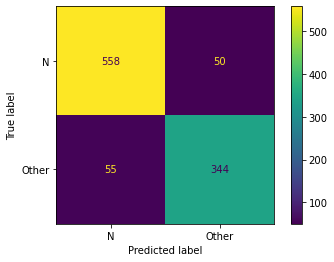

In [13]:
y_new_pred = clf.predict(X_new_test_scaled)

print(classification_report(Y_new_test, y_new_pred,zero_division=0))
ConfusionMatrixDisplay(confusion_matrix(Y_new_test,y_new_pred),display_labels=['N','Other']).plot();